In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import country_converter as coco

In [2]:
data = pd.read_csv('./hotel_bookings.csv')

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.shape
data.isnull().values.any()
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                                percent_missing
hotel                                  0.000000
total_of_special_requests              0.000000
required_car_parking_spaces            0.000000
adr                                    0.000000
customer_type                          0.000000
days_in_waiting_list                   0.000000
deposit_type                           0.000000
booking_changes                        0.000000
assigned_room_type                     0.000000
reserved_room_type                     0.000000
previous_bookings_not_canceled         0.000000
previous_cancellations                 0.000000
is_repeated_guest                      0.000000
reservation_status                     0.000000
distribution_channel                   0.000000
reservation_status_date                0.000000
meal                                   0.000000
babies                                 0.000000
adults                                 0.000000
stays_in_week_nights                   0

In [6]:
data = data.drop('company',axis =1) # drop company column
########==============================================########
data = data.drop('agent',axis =1)
########==============================================########
data = data[data['children'].notna()]
data["country"].fillna("other country", inplace = True)

In [7]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

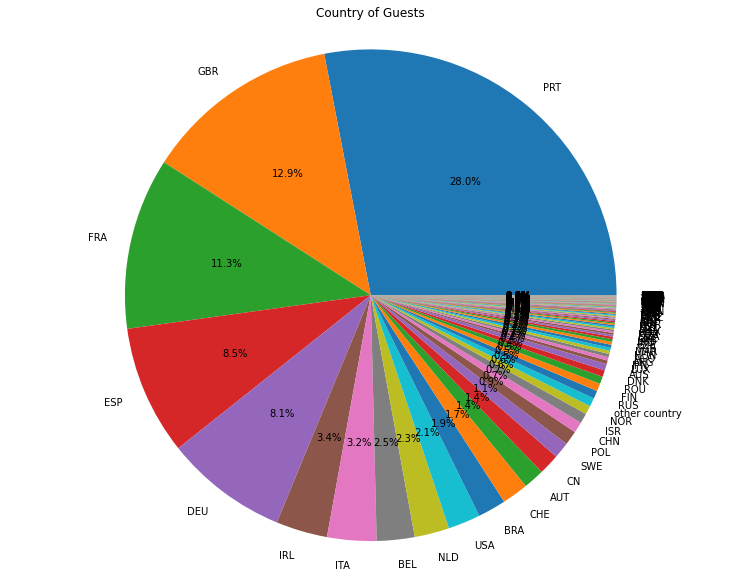

In [8]:
#### Where do guests come from
country = pd.DataFrame(data.loc[data["is_canceled"] == 0]["country"].value_counts())
country.rename(columns={"country": "#reservations"},inplace=True)
# print(country)
totalGuests = sum(data["is_canceled"]==0)
# print(totalGuests)
country["%reservations"] = country["#reservations"]/totalGuests*100
# print(country)
country["country"] = country.index
# print(country)
plt.figure(figsize =(13,10))
plt.pie(country["#reservations"],labels=country["country"],radius=5,autopct='%1.1f%%')
plt.title('Country of Guests')
plt.axis('equal')
plt.show()

In [ ]:
cc = coco.CountryConverter()
continents = []
for index, row in data.iterrows():

    continent = cc.convert([row.country], to='continent')
    continents.append(continent)
cont_df = pd.DataFrame(continents, columns=['continent'])
bookings = pd.concat([data, cont_df], 1)
cont_df.head()

bookings = pd.concat([data, cont_df], 1)

sns.countplot(x='continent', data=bookings,order = bookings['continent'].value_counts().head(5).index)
plt.xlabel("Continent")
plt.ylabel("bookings")
plt.title("bookings in continents")
plt.show

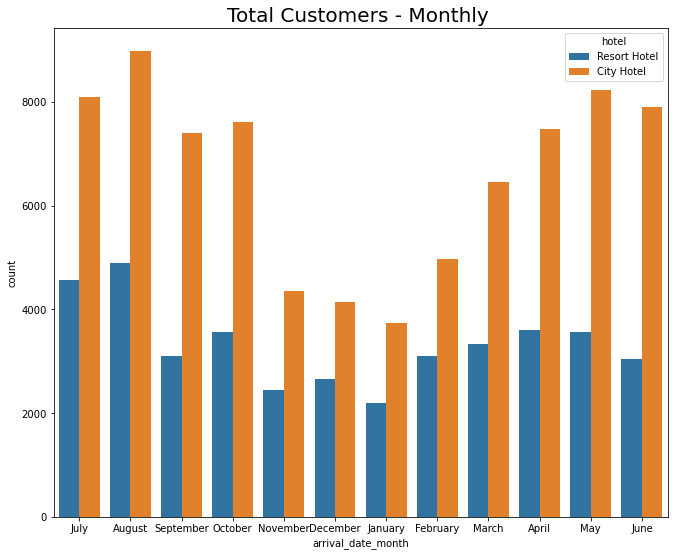

In [9]:
plt.figure(figsize =(11,9))
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = data)

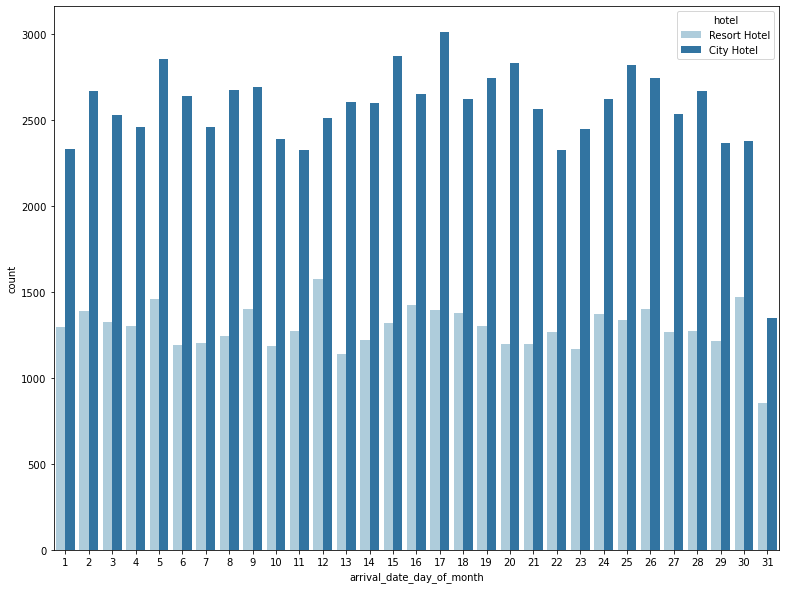

In [46]:
plt.figure(figsize =(13,10))
sns.countplot(data = data, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired',)
plt.show()

<ipython-input-47-9818ee8a78c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_bookings['total_span_of_stay'] = confirmed_bookings.stays_in_week_nights + confirmed_bookings.stays_in_weekend_nights


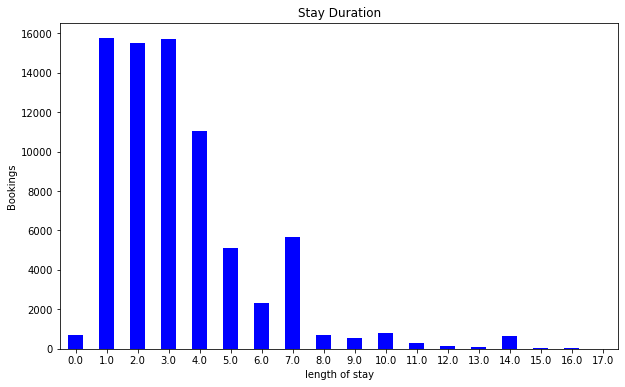

In [47]:
confirmed_bookings = bookings[bookings.is_canceled==0]
confirmed_bookings.head()
confirmed_bookings['total_span_of_stay'] = confirmed_bookings.stays_in_week_nights + confirmed_bookings.stays_in_weekend_nights
length_of_stay = confirmed_bookings.total_span_of_stay.value_counts().sort_index()
length_of_stay.head(18).plot(kind='bar', figsize=(10,6), title = 'length of stay', color='blue')
plt.title('Stay Duration')
plt.xlabel('length of stay')
plt.ylabel('Bookings')
plt.xticks(rotation='horizontal')
plt.show()

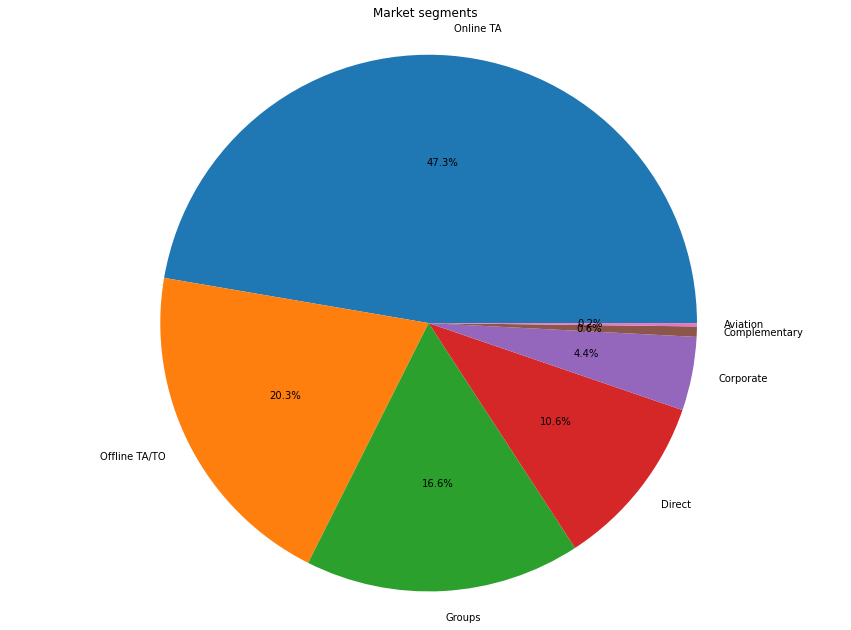

In [10]:
# total bookings per market segment (incl. canceled)
segments=data["market_segment"].value_counts()

# pie plot
plt.figure(figsize =(15,11))
plt.pie(segments.values,labels=segments.index,radius=5,autopct='%1.1f%%')
plt.title('Market segments')
plt.axis('equal')
plt.show()

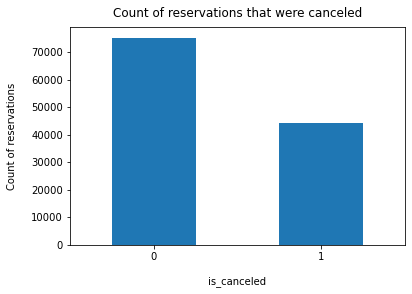

In [11]:
data['is_canceled'].value_counts().plot.bar(rot=0)
plt.xlabel("is_canceled", labelpad=14)
plt.ylabel("Count of reservations", labelpad=14)
plt.title("Count of reservations that were canceled", y=1.02);

In [12]:
corr_matrix = data.corr()
corr_matrix["is_canceled"].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293177
previous_cancellations            0.110140
adults                            0.059990
days_in_waiting_list              0.054193
adr                               0.047622
stays_in_week_nights              0.024771
arrival_date_year                 0.016732
arrival_date_week_number          0.008132
children                          0.005048
stays_in_weekend_nights          -0.001783
arrival_date_day_of_month        -0.006084
babies                           -0.032488
previous_bookings_not_canceled   -0.057355
is_repeated_guest                -0.084788
booking_changes                  -0.144371
required_car_parking_spaces      -0.195492
total_of_special_requests        -0.234706
Name: is_canceled, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

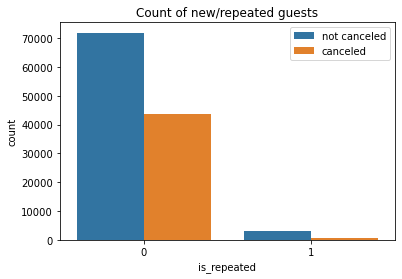

In [21]:
sns.countplot(x = data["is_repeated_guest"], hue = data['is_canceled'])
plt.title("Count of new/repeated guests")
plt.xlabel("is_repeated")
plt.legend(["not canceled", "canceled"])
plt.show

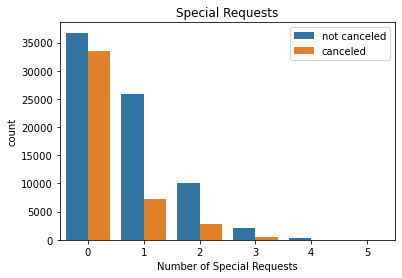

In [14]:
# plot special requests according to cancellations
# plt.figure(figsize=(10,5))
sns.countplot(x=data["total_of_special_requests"], hue=data["is_canceled"])
plt.title("Special Requests")
plt.xlabel("Number of Special Requests")
plt.legend(["not canceled", "canceled"])
plt.show()

0    111970
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64


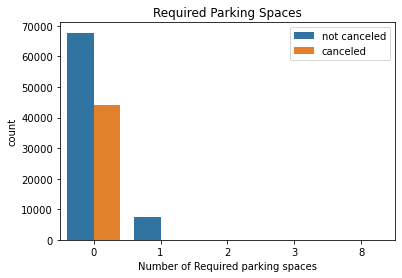

In [15]:
print(data["required_car_parking_spaces"].value_counts().sort_index())
# plt.figure(figsize=(10,5))
sns.countplot(x=data["required_car_parking_spaces"], hue=data["is_canceled"])
plt.title("Required Parking Spaces")
plt.xlabel("Number of Required parking spaces")
plt.legend(["not canceled", "canceled"])
plt.show()

0     101310
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
11         2
12         2
13         5
14         5
15         3
16         2
17         2
18         1
20         1
21         1
Name: booking_changes, dtype: int64


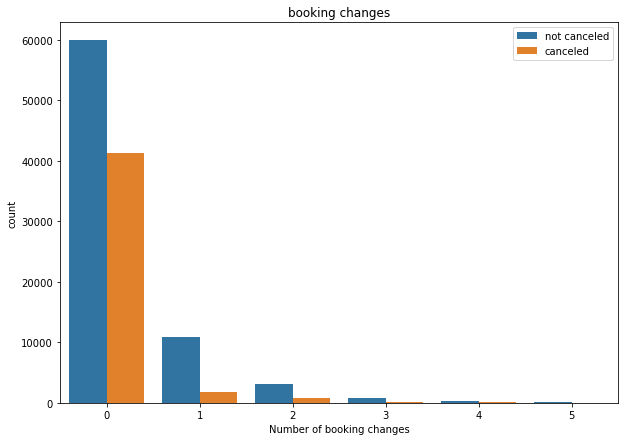

In [16]:
print(data["booking_changes"].value_counts().sort_index())
plt.figure(figsize=(10,7))
d2 = data[data["booking_changes"]<6]
sns.countplot(x=d2["booking_changes"], hue=data["is_canceled"])
plt.title("booking changes")
plt.xlabel("Number of booking changes")
plt.legend(["not canceled", "canceled"])
plt.show()

0     112902
1       6051
2        116
3         65
4         31
5         19
6         22
11        35
13        12
14        14
19        19
21         1
24        48
25        25
26        26
Name: previous_cancellations, dtype: int64


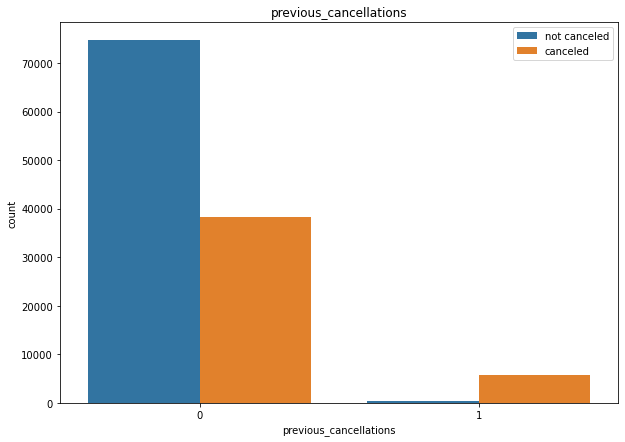

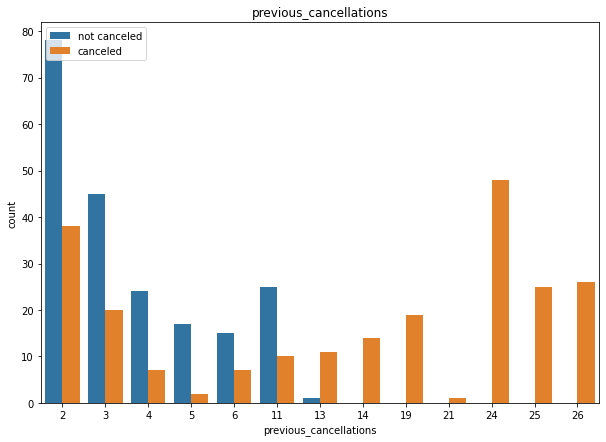

In [35]:
print(data["previous_cancellations"].value_counts().sort_index())
plt.figure(figsize=(10,7))
d2 = data[data["previous_cancellations"]<2]
sns.countplot(x=d2["previous_cancellations"], hue=data["is_canceled"])
plt.title("previous_cancellations")
# plt.xlabel("Number o")
plt.legend(["not canceled", "canceled"])
plt.show()
plt.figure(figsize=(10,7))
d2 = data[data["previous_cancellations"]>1]
sns.countplot(x=d2["previous_cancellations"], hue=data["is_canceled"])
plt.title("previous_cancellations")
# plt.xlabel("Number o")
plt.legend(["not canceled", "canceled"])
plt.show()

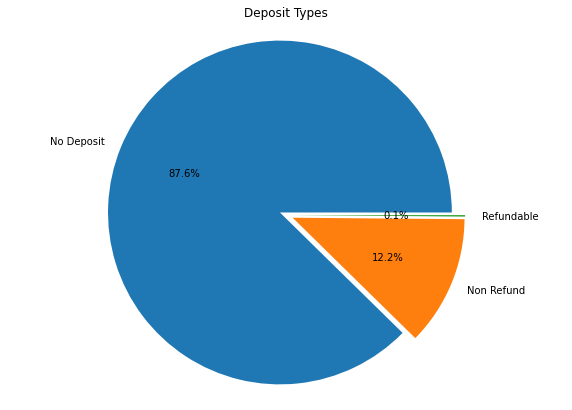

In [17]:
# calculate deposit type instances percentage in data
types=data["deposit_type"].value_counts()
explode = (0.2,0.2,0.2)
# pie plot
plt.figure(figsize =(10,7))
plt.pie(types.values,labels=types.index,radius=5,autopct='%1.1f%%',explode = explode)
plt.title('Deposit Types')
plt.axis('equal')
plt.show()

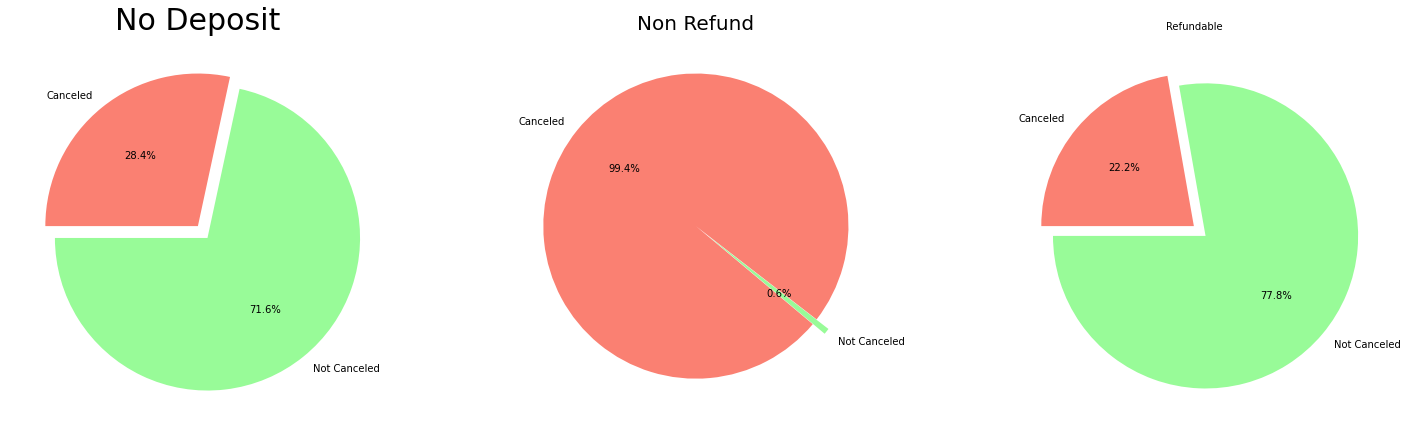

In [18]:
noRefund_notC = (data[data["deposit_type"]=="Non Refund"]["is_canceled"]==0).sum()
noRefund_C = (data[data["deposit_type"]=="Non Refund"]["is_canceled"]==1).sum()
refund_notC = (data[data["deposit_type"]=="Refundable"]["is_canceled"]==0).sum()
refund_C = (data[data["deposit_type"]=="Refundable"]["is_canceled"]==1).sum()
noDeposit_notC = (data[data["deposit_type"]=="No Deposit"]["is_canceled"]==0).sum()
noDeposit_C = (data[data["deposit_type"]=="No Deposit"]["is_canceled"]==1).sum()

df_deposit_type = pd.DataFrame(index=["Not Canceled", "Canceled"])
df_deposit_type["no_deposit"] = [noDeposit_notC, noDeposit_C]
df_deposit_type["non_refund"] = [noRefund_notC, noRefund_C]
df_deposit_type["refundable"] = [refund_notC, refund_C]

# pie plot of cancellations according to deposit type
# cancel_labels = ["cancelled", "not_cancelled"]
fig, dx = plt.subplots(1,3, figsize=(21,6))
explode = (0.1,0.0)

dx[0].pie(df_deposit_type["no_deposit"], labels=df_deposit_type.index, autopct='%1.1f%%',
          colors=['palegreen','salmon'], explode = explode , startangle = 180)
dx[0].set_title("No Deposit",size=30)

dx[1].pie(df_deposit_type["non_refund"], labels=df_deposit_type.index, autopct='%1.1f%%',
          colors=['palegreen','salmon'], explode = explode, startangle = 320)
dx[1].set_title("Non Refund",size=20)

dx[2].pie(df_deposit_type["refundable"], labels=df_deposit_type.index, autopct='%1.1f%%',
          colors=['palegreen','salmon'], explode = explode, startangle = 180)
dx[2].set_title("Refundable",size=10)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='meal', ylabel='count'>

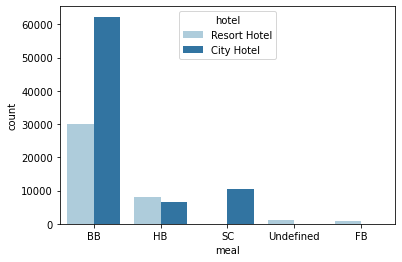

In [48]:
sns.countplot(palette='Paired' ,hue= 'hotel', x='meal', data=data,
              order = data['meal'].value_counts().index)

<AxesSubplot:xlabel='assigned_room_type', ylabel='count'>

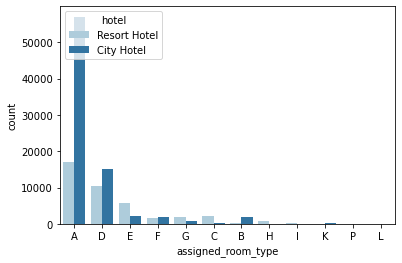

In [49]:
sns.countplot(palette='Paired' ,hue= 'hotel', x='assigned_room_type', data=data,
              order = data['assigned_room_type'].value_counts().index)